In [5]:
%pip install ultralytics

In [6]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from google.colab import drive
from matplotlib.patches import Rectangle
import glob
import cv2

In [7]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb disabled

/bin/bash: line 1: wandb: command not found


In [8]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Input_path = '/content/drive/MyDrive/archive/css-data'
Work_path = '/content/drive/MyDrive/archive/results_yolov8n_100e/kaggle/working'

In [10]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [11]:
dict_file = {'train': os.path.join(Input_path, 'train'),
             'val': os.path.join(Input_path, 'valid'),
             'test': os.path.join(Input_path, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join(Work_path, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [12]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'valid', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(Input_path, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

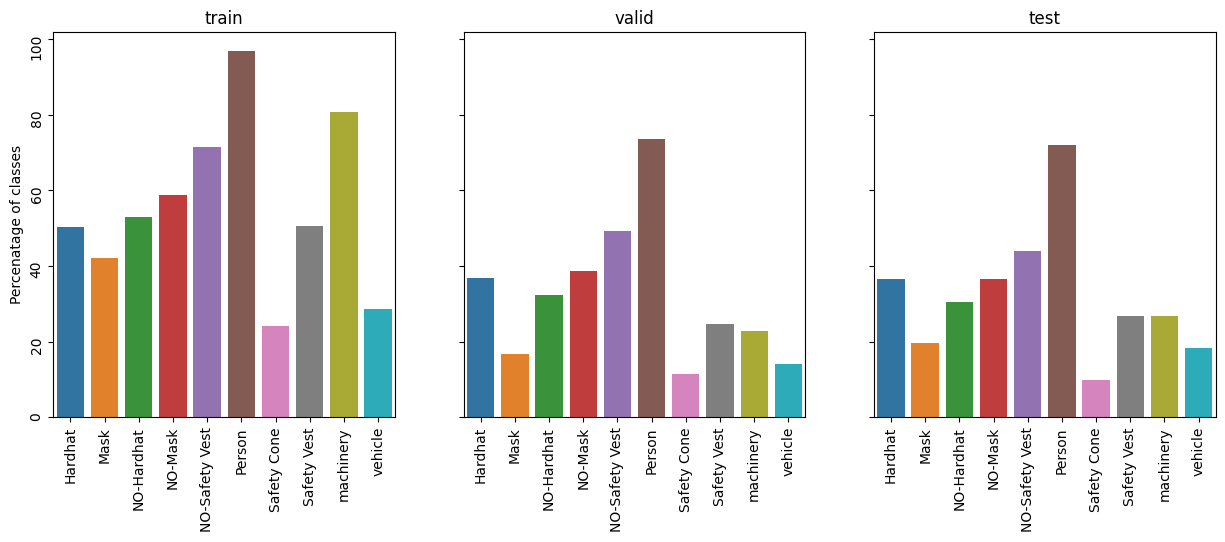

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

In [14]:
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [15]:
for mode in ['train', 'valid', 'test']:

    files =  glob.glob(os.path.join(Input_path, mode, 'images', '*'))

    print(f'{mode} set size: {len(files)}\n')

train set size: 2662

valid set size: 114

test set size: 82



In [16]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.9MB/s]


In [17]:
model.train(data=os.path.join(Work_path,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=10,
            batch=32,
            mode='train',
            name='yolov8n_v1_train')

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/archive/results_yolov8n_100e/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/archive/css-data/train/labels.cache... 2605 images, 63 backgrounds, 0 corrupt: 100%|██████████| 2662/2662 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/archive/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/archive/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed



val: Scanning /content/drive/MyDrive/archive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]

Plotting labels to runs/detect/yolov8n_v1_train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_v1_train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.426      2.925      1.521         74        640: 100%|██████████| 84/84 [05:55<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]

                   all        114        697      0.559      0.188      0.315      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.361      1.897      1.468         51        640: 100%|██████████| 84/84 [05:38<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]

                   all        114        697      0.536      0.422      0.419      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.32      1.705      1.436         91        640: 100%|██████████| 84/84 [05:36<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.25s/it]

                   all        114        697      0.684      0.452      0.515      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.285      1.583      1.404         83        640: 100%|██████████| 84/84 [05:37<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.97s/it]

                   all        114        697      0.608      0.519      0.551      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.246      1.477      1.374        105        640: 100%|██████████| 84/84 [05:25<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.06s/it]

                   all        114        697      0.673      0.551      0.596      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.206      1.384      1.345         94        640: 100%|██████████| 84/84 [05:39<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]

                   all        114        697      0.682      0.598      0.629      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.168      1.288      1.311        107        640: 100%|██████████| 84/84 [05:34<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.80s/it]

                   all        114        697      0.765      0.557      0.634      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.136      1.227      1.292         90        640: 100%|██████████| 84/84 [05:33<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.06s/it]

                   all        114        697      0.801      0.591      0.656      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G        1.1      1.156       1.26         94        640: 100%|██████████| 84/84 [05:29<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]

                   all        114        697      0.786      0.613      0.685      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.067      1.095      1.239        102        640: 100%|██████████| 84/84 [05:39<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.00s/it]

                   all        114        697      0.798      0.614      0.693      0.369



10 epochs completed in 0.956 hours.
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_v1_train/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]


                   all        114        697        0.8      0.613      0.693       0.37
               Hardhat         42         79      0.907      0.671      0.807      0.468
                  Mask         19         21      0.878       0.81      0.834      0.462
            NO-Hardhat         37         69      0.741      0.478      0.532      0.247
               NO-Mask         44         74      0.732      0.405      0.507      0.235
        NO-Safety Vest         56        106      0.732      0.528      0.605      0.319
                Person         84        166      0.778      0.657       0.74      0.399
           Safety Cone         13         44      0.765      0.727      0.791      0.361
           Safety Vest         28         41      0.868      0.683      0.776      0.447
             machinery         26         55      0.802        0.8      0.853      0.493
               vehicle         16         42      0.798      0.376      0.484      0.266
Speed: 0.6ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc82ced6470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [18]:
model = YOLO('runs/detect/yolov8n_v1_train/weights/best.pt')

In [19]:
results = model.predict(source=os.path.join(Input_path, 'test', 'images'), save=True)


image 1/82 /content/drive/MyDrive/archive/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 3 Persons, 57.4ms
image 2/82 /content/drive/MyDrive/archive/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 2 NO-Masks, 2 Persons, 2 machinerys, 56.4ms
image 3/82 /content/drive/MyDrive/archive/css-data/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 4 Persons, 53.5ms
image 4/82 /content/drive/MyDrive/archive/css-data/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 1 Person, 1 Safety Cone, 52.8ms
image 5/82 /content/drive/MyDrive/archive/css-data/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 7 NO-Safety Vests, 7 Persons, 2 Safety Vests, 54.7ms
image 6/82 /content/drive/MyDrive/archive/css-data/test/images/004763_jpg.rf.46484e6ca73caeaa9de45822cf1085a9.jpg: 640x640 3 Hardhats, 3 

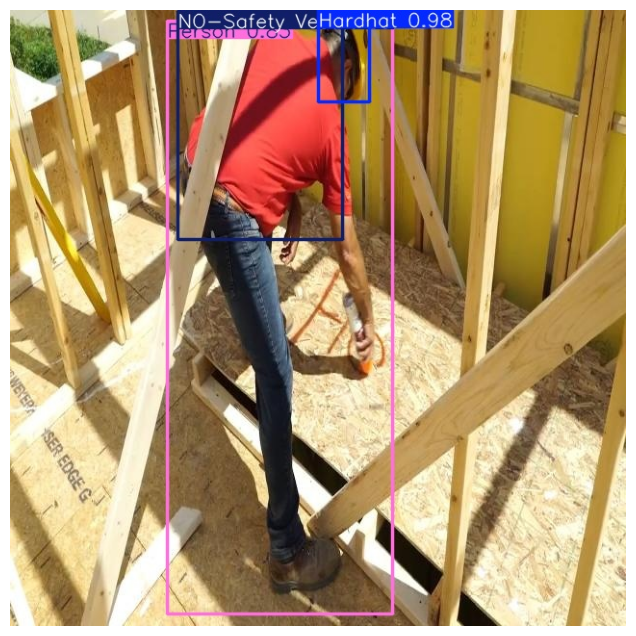

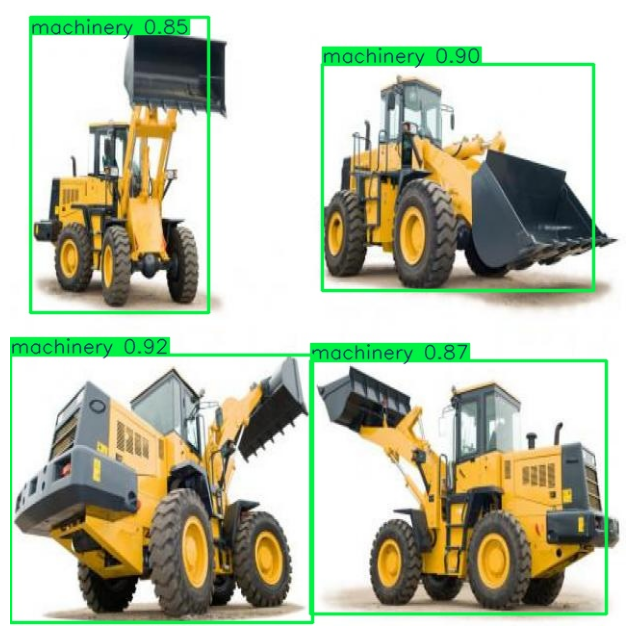

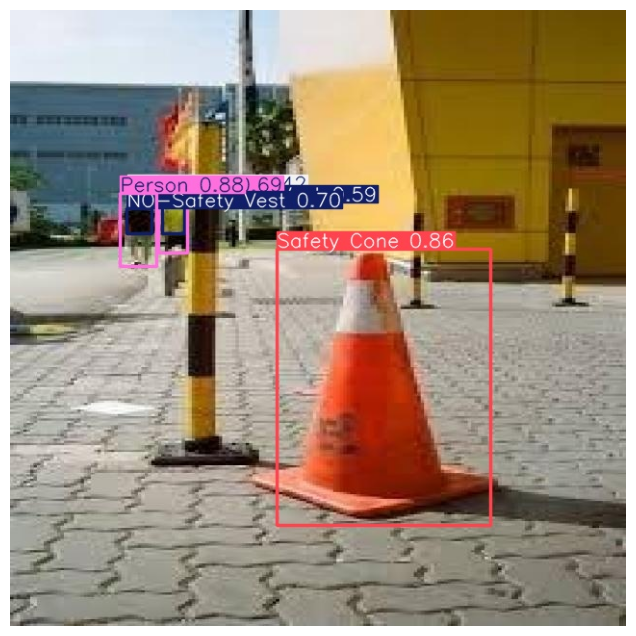

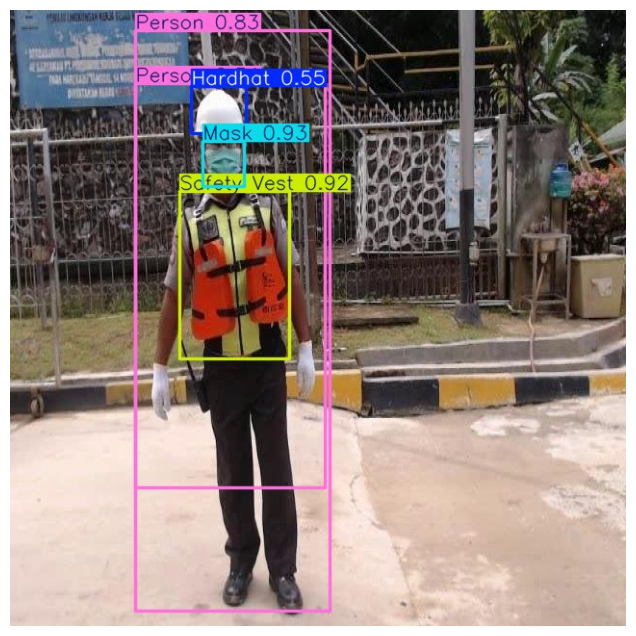

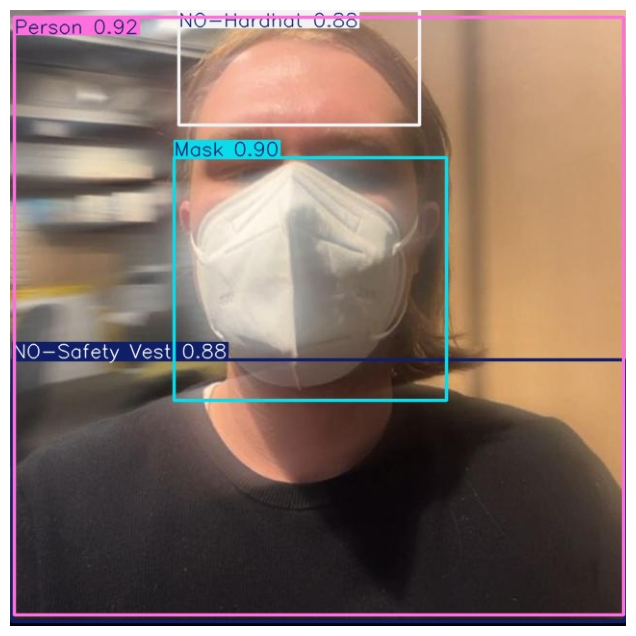

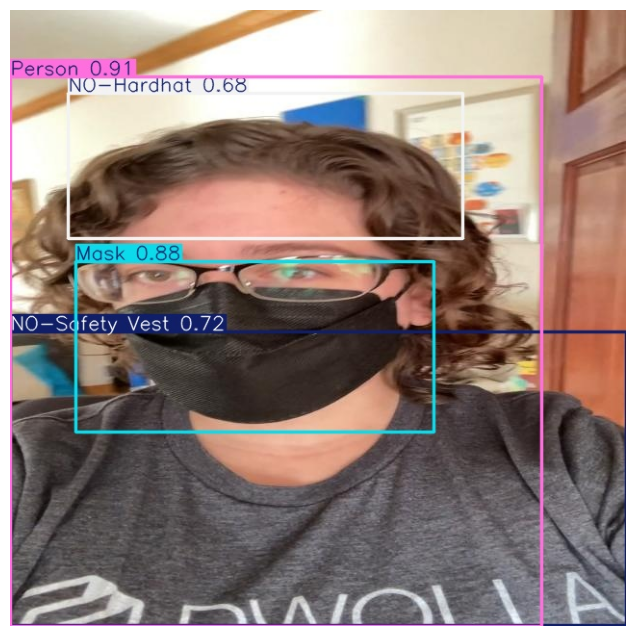

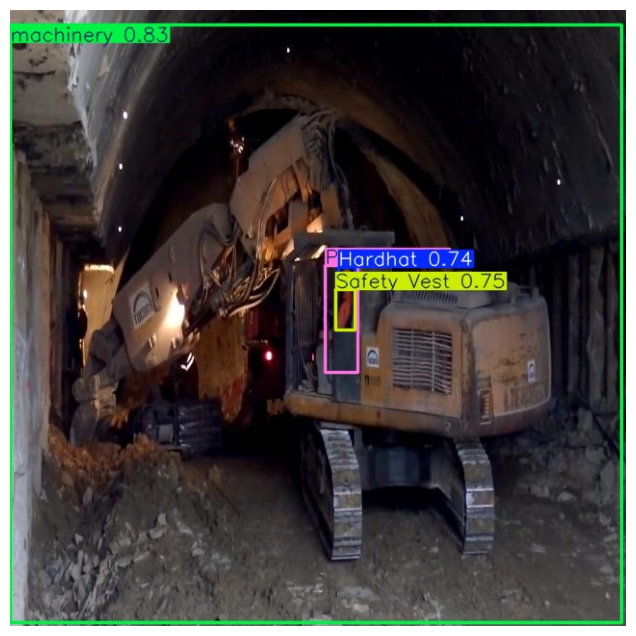

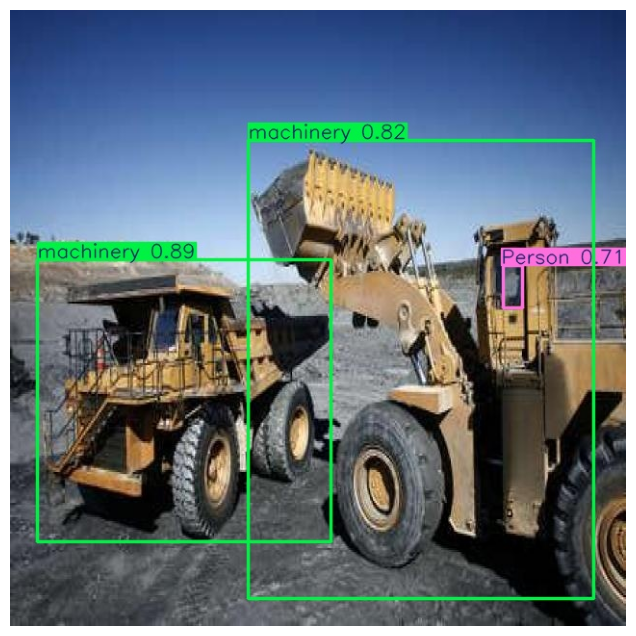

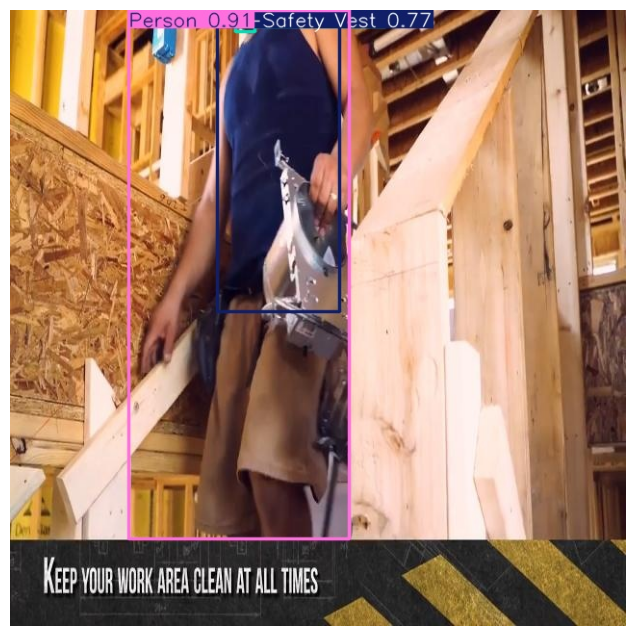

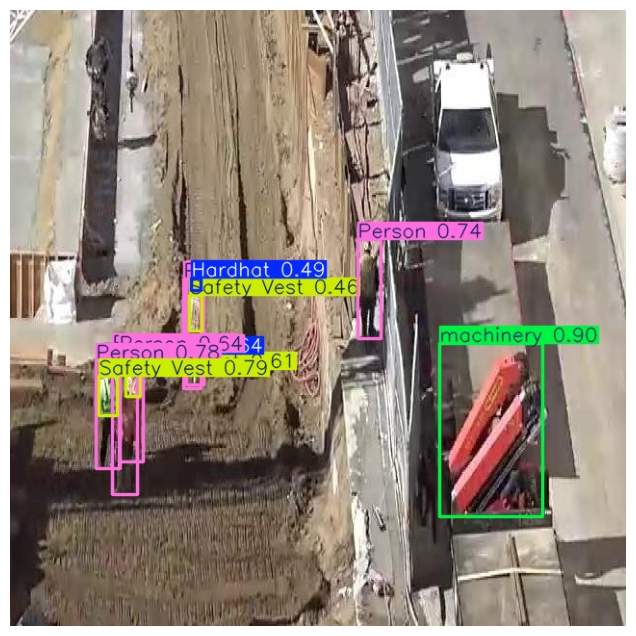

In [28]:
%matplotlib inline

predicitions = glob.glob(os.path.join(Work_path, 'predictions', '*'))
n = min(10, len(predicitions))

for i in range(n):
    idx = np.random.randint(0, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.grid(False)
    plt.axis('off')
    plt.show()